---
# Project: Analysis of Batter-Pitcher Interactions Using Bat Speed and Swing Length

### Overview

This project aims to explore the intricate dynamics between batters and pitchers by analyzing new baseball data on bat speed and swing length. Using detailed pitch-level data from Major League Baseball games between 04/02/2024 and 06/30/2024, the study investigates how these metrics influence or reflect various aspects of the batter-pitcher interaction.

### Program Description

**Stage/Step 1:** This program utilizes pre-processed MLB data to perform model training and evaluation, focusing on the relationship between bat speed, swing length, and batter performance metrics.

### Analysis Focus

The notebook concentrates on:

- Examining the correlation between bat speed, swing length, and plate discipline.
- Identifying patterns in swing types relative to different game situations.
- Evaluating the influence of pitchers on batter swing mechanics.

### High-Level Process Flow

1. **Loading Data**
2. **Data Preprocessing**
3. **Exploratory Data Analysis**
4. **Model Training and Evaluation**
5. **Results Visualization**
6. **Exporting Findings**

### Data

- **Input Data:** MLB pitch-level dataset with bat speed and swing length metrics (04/02/2024 - 06/30/2024).
- **Output Data:** Model performance metrics, analytical results, and visualizations.

### Special Instructions

- Ensure the input data path is correctly specified before running the script.
- Dependencies include libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn`.

### Author and Timing

- **Author:** *Sathwik Bollepalli*
- **Date:** *10/22/2024*

---

In [50]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [54]:
pitch_swing_data = pd.read_csv(
    '../data/statcast_pitch_swing_data_20240402_20240630.csv', 
    engine='python'
)
pitch_swing_data.shape

(346250, 94)

In [ ]:
pitch_swing_data = pd.read_csv(
    '../statcast_pitch_swing_data_20240402_20240630.zip', 
    compression='zip',
    engine='python'
)

In [4]:
pitch_swing_data.sample(5)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
1821,FF,2024-04-02,86.9,3.12,5.14,"Chapman, Matt",656305,642232,NaN,ball,...,1,1,1,Standard,Standard,111.0,0.000,0.048,NaN,NaN
214975,FF,2024-05-28,92.0,-0.45,5.97,"Schuemann, Max",680474,641793,strikeout,called_strike,...,0,3,0,Standard,Standard,211.0,0.016,-0.300,NaN,NaN
307354,SI,2024-06-21,93.7,-1.08,5.87,"Springer, George",543807,471911,field_out,hit_into_play,...,7,1,7,Strategic,Standard,212.0,0.005,-0.157,72.813008,7.21467
235928,ST,2024-06-02,83.3,-1.91,6.03,"Barnes, Austin",605131,663567,NaN,ball,...,3,3,0,Standard,Standard,45.0,0.000,0.016,NaN,NaN
7426,FF,2024-04-03,90.5,-2.00,5.89,"Ward, Taylor",621493,572143,NaN,called_strike,...,2,4,2,Standard,Standard,200.0,0.000,-0.033,NaN,NaN


In [5]:
pitch_swing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346250 entries, 0 to 346249
Data columns (total 94 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   pitch_type                       346000 non-null  object 
 1   game_date                        346250 non-null  object 
 2   release_speed                    345997 non-null  float64
 3   release_pos_x                    345998 non-null  float64
 4   release_pos_z                    345998 non-null  float64
 5   player_name                      346250 non-null  object 
 6   batter                           346250 non-null  int64  
 7   pitcher                          346250 non-null  int64  
 8   events                           89144 non-null   object 
 9   description                      346250 non-null  object 
 10  spin_dir                         0 non-null       float64
 11  spin_rate_deprecated             0 non-null       float64
 12  br

In [49]:
missing_pct = pd.DataFrame(pitch_swing_data.isnull().mean()*100).reset_index()

missing_pct[missing_pct[0]>80]

,index,0
10,spin_dir,100.000000
11,spin_rate_deprecated,100.000000
12,break_angle_deprecated,100.000000
13,break_length_deprecated,100.000000
23,bb_type,82.353502
31,on_3b,90.728953
32,on_2b,81.217329
37,hc_x,82.358989
38,hc_y,82.358989
39,tfs_deprecated,100.000000


In [6]:
pitch_swing_data.describe()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
count,345997.000000,345998.000000,345998.000000,346250.000000,346250.000000,0.0,0.0,0.0,0.0,345998.000000,...,346250.000000,346250.000000,346250.000000,346250.000000,346250.000000,344049.000000,346250.000000,346230.000000,155826.000000,155812.000000
mean,89.054222,-0.808297,5.760631,640341.389103,635722.940624,NaN,NaN,NaN,NaN,9.040442,...,2.183864,2.231353,2.112918,2.160407,2.183864,175.860424,0.000148,-0.000182,69.524839,7.228375
std,5.938723,1.870899,0.536150,50853.025059,53502.645360,NaN,NaN,NaN,NaN,4.239416,...,2.548858,2.556218,2.457642,2.466640,2.548858,72.457796,0.027843,0.240541,8.587908,0.979416
min,31.900000,-4.680000,0.850000,444482.000000,434378.000000,NaN,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.776000,-1.479000,0.851208,0.305870
25%,84.700000,-2.120000,5.490000,621028.000000,607192.000000,NaN,NaN,NaN,NaN,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,128.000000,0.000000,-0.064000,67.006615,6.660660
50%,89.900000,-1.490000,5.800000,663624.000000,656887.000000,NaN,NaN,NaN,NaN,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,199.000000,0.000000,-0.015000,70.907687,7.282000
75%,93.900000,0.920000,6.090000,671218.000000,670059.000000,NaN,NaN,NaN,NaN,13.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,223.000000,0.000000,0.032000,74.197170,7.884032
max,104.000000,4.620000,7.530000,808982.000000,814005.000000,NaN,NaN,NaN,NaN,14.000000,...,20.000000,17.000000,20.000000,20.000000,20.000000,360.000000,0.840000,3.503000,87.978801,10.386860


In [7]:
pitch_swing_data['pitch_type'].value_counts()

pitch_type
FF    108346
SL     57024
SI     55770
CH     35317
FC     28199
CU     22573
ST     20013
FS     10920
KC      5524
SV      1159
KN       576
FA       288
EP       166
FO       102
PO        20
CS         3
Name: count, dtype: int64

In [10]:
pitch_swing_data['game_date'].min(), pitch_swing_data['game_date'].max()

('2024-04-02', '2024-06-30')

<Axes: >

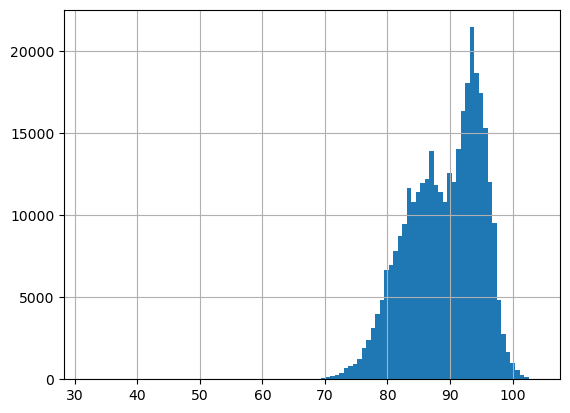

In [18]:
pitch_swing_data['release_speed'].hist(bins = 100)

<Axes: >

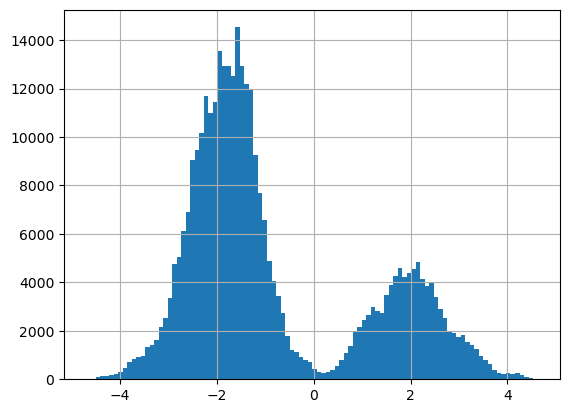

In [20]:
pitch_swing_data['release_pos_x'].hist(bins = 100)

<Axes: >

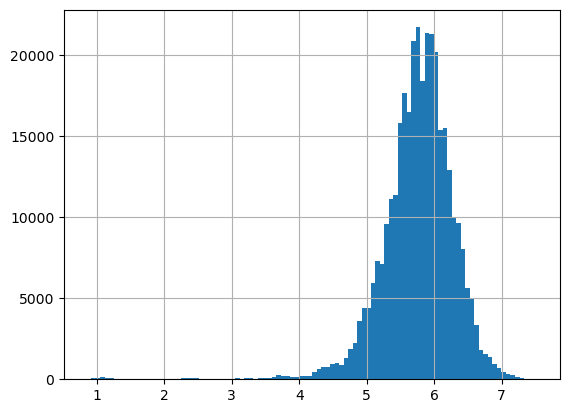

In [21]:
pitch_swing_data['release_pos_z'].hist(bins = 100)

In [22]:
pitch_swing_data['player_name'].nunique()

559

In [23]:
pitch_swing_data['batter'].nunique()

559

In [24]:
pitch_swing_data['pitcher'].nunique()

689

In [26]:
pitch_swing_data['events'].value_counts()

events
field_out                       36512
strikeout                       19716
single                          12643
walk                             7042
double                           3812
home_run                         2532
force_out                        1716
grounded_into_double_play        1614
hit_by_pitch                     1012
sac_fly                           621
field_error                       570
triple                            353
sac_bunt                          225
fielders_choice                   176
fielders_choice_out               163
double_play                       161
caught_stealing_2b                131
strikeout_double_play              57
catcher_interf                     55
other_out                           9
caught_stealing_home                6
caught_stealing_3b                  6
pickoff_1b                          4
stolen_base_2b                      2
sac_fly_double_play                 2
pickoff_caught_stealing_3b          1
picko

In [27]:
pitch_swing_data['description'].value_counts()

description
ball                       115169
foul                        62378
hit_into_play               61105
called_strike               57244
swinging_strike             35799
blocked_ball                 7308
foul_tip                     3654
swinging_strike_blocked      1877
hit_by_pitch                 1012
foul_bunt                     586
missed_bunt                    94
pitchout                       20
bunt_foul_tip                   4
Name: count, dtype: int64

In [32]:
pitch_swing_data['spin_dir'].value_counts()

Series([], Name: count, dtype: int64)

In [33]:
pitch_swing_data['spin_rate_deprecated'].value_counts()

Series([], Name: count, dtype: int64)

In [34]:
pitch_swing_data['break_angle_deprecated'].value_counts()

Series([], Name: count, dtype: int64)

In [35]:
pitch_swing_data['break_length_deprecated'].value_counts()

Series([], Name: count, dtype: int64)

In [36]:
pitch_swing_data['zone'].value_counts()

zone
14.0    66145
13.0    42739
11.0    35822
12.0    28753
5.0     26187
8.0     22494
6.0     21387
4.0     20401
9.0     20097
2.0     17517
7.0     16550
1.0     14514
3.0     13392
Name: count, dtype: int64

In [37]:
pitch_swing_data['des'].value_counts()

des
Bryan De La Cruz strikes out swinging.                                                            365
Ezequiel Tovar strikes out swinging.                                                              359
Cal Raleigh strikes out swinging.                                                                 357
Kyle Schwarber strikes out swinging.                                                              348
Paul DeJong strikes out swinging.                                                                 335
                                                                                                 ... 
Tyler Fitzgerald flies out to center fielder Andy Pages.                                            1
Chas McCormick singles on a line drive to left fielder Brandon Nimmo.   Mauricio Dubón scores.      1
Trey Cabbage flies out to center fielder Harrison Bader.   Mauricio Dubón to 3rd.                   1
Austin Slater grounds out to first baseman Cavan Biggio.                      

In [38]:
pitch_swing_data['game_type'].value_counts()

game_type
R    346250
Name: count, dtype: int64

In [39]:
pitch_swing_data['stand'].value_counts()

stand
R    200003
L    146247
Name: count, dtype: int64

In [40]:
pitch_swing_data['p_throws'].value_counts()

p_throws
R    252561
L     93689
Name: count, dtype: int64

In [29]:
pitch_swing_data.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher_1',
       'fielder_2_1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima